# Лабораторная работа №7
# "Модель конкуренции"
## Вариант 29

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = 5
a = 0.1
q = 2
N0 = 100
C0 = 6

In [3]:
def simulate(f, T=20, dt=0.001):
    steps = int(T/dt)
    N = np.zeros(steps)
    C = np.zeros(steps)
    t = np.linspace(0, T, steps)
    N[0] = N0
    C[0] = C0
    for i in range(steps - 1):
        dN = r*N[i] - a*C[i]*N[i]
        dC = f*a*C[i]*N[i] - q*C[i]
        N[i+1] = N[i] + dN*dt
        C[i+1] = C[i] + dC*dt
    return t, N, C

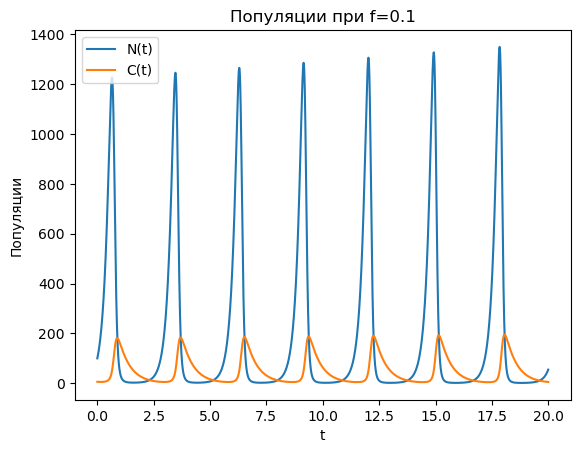

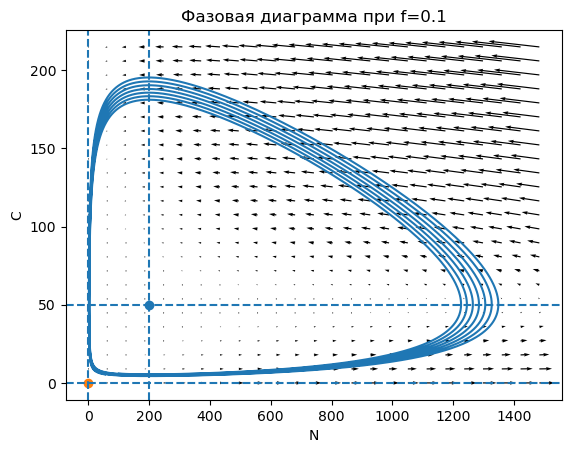

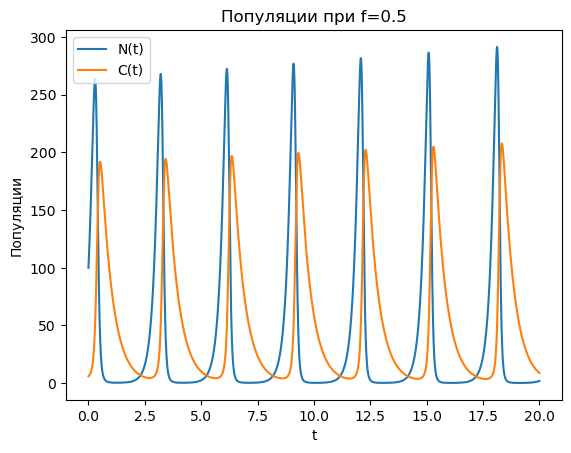

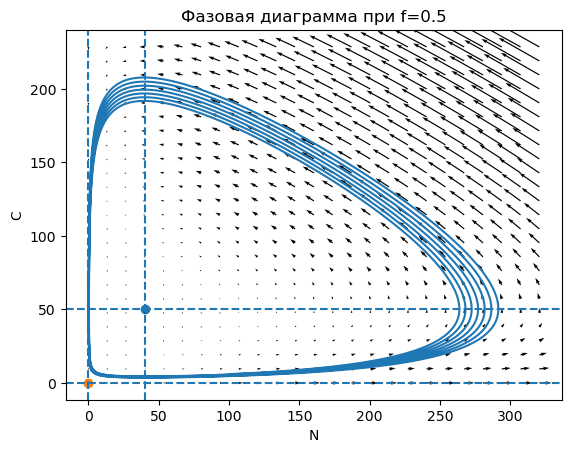

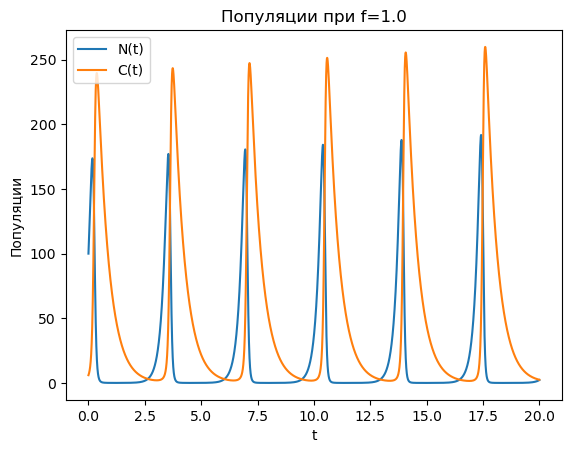

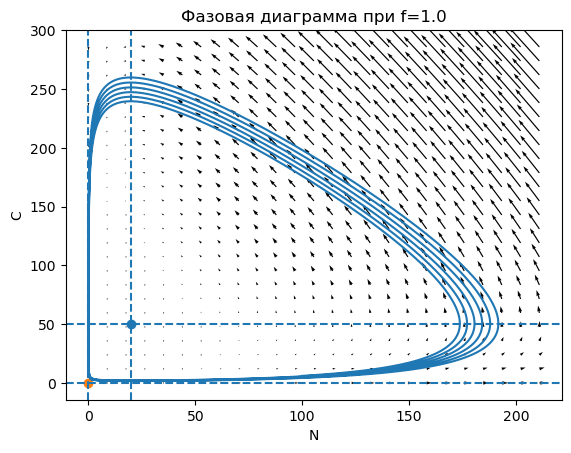

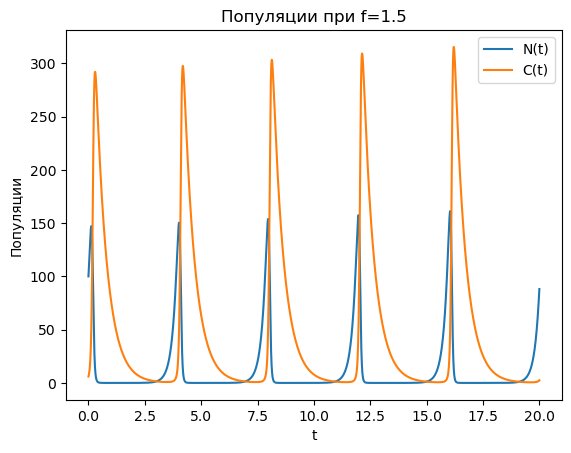

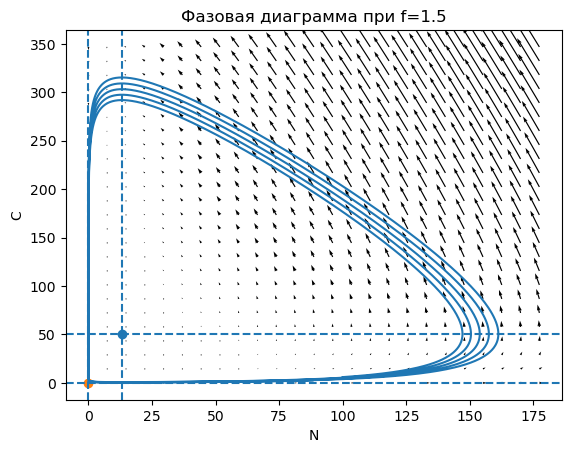

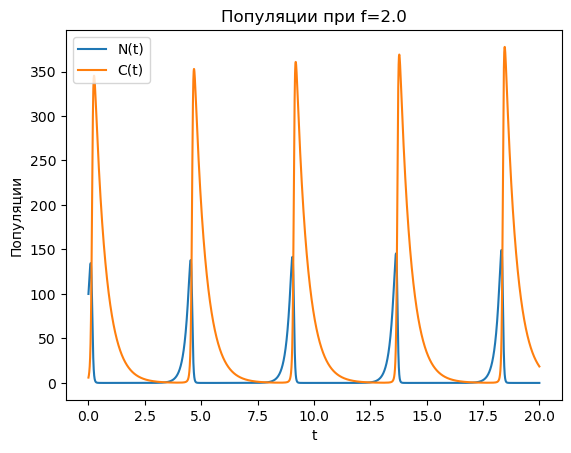

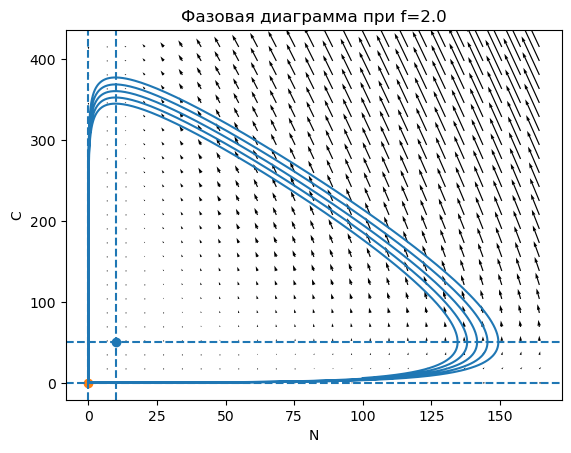

In [4]:
fs = [0.1,0.5, 1.0, 1.5, 2.0]

for f in fs:
    t, N, C = simulate(f)

    plt.figure()
    plt.plot(t, N, label="N(t)")
    plt.plot(t, C, label="C(t)")
    plt.xlabel("t")
    plt.ylabel("Популяции")
    plt.title(f"Популяции при f={f}")
    plt.legend()
    plt.show()

    plt.figure()

    plt.plot(N, C)

    Neq = 20/f
    Ceq = 50
    plt.scatter([Neq], [Ceq]) 
    plt.scatter([0], [0])

    plt.axhline(50, linestyle='--')      # C = 50
    plt.axvline(20/f, linestyle='--')    # N = 20/f
    plt.axhline(0, linestyle='--')       # C = 0
    plt.axvline(0/f, linestyle='--')     # N = 0

    N_vals = np.linspace(0, max(N)*1.1, 25)
    C_vals = np.linspace(0, max(C)*1.1, 25)
    NN, CC = np.meshgrid(N_vals, C_vals)
    dN = r*NN - a*NN*CC
    dC = f*a*NN*CC - q*CC
    plt.quiver(NN, CC, dN, dC)

    plt.xlabel("N")
    plt.ylabel("C")
    plt.title(f"Фазовая диаграмма при f={f}")
    #plt.legend()
    plt.show()